In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('../data/arg_industrialproduction_raw.csv')
df = df.T
df

,0
Country,Argentina
Country Code,ARG
Series,"Industrial Production, constant US$, seas. adj.,,"
Series Code,IPTOTSAKD
1987 [1987],..
...,...
2020M06 [2020M06],..
2020M07 [2020M07],..
2020Q1 [2020Q1],..
2020Q2 [2020Q2],..


In [14]:
df = df.reset_index()
df

,index,0
0,Country,Argentina
1,Country Code,ARG
2,Series,"Industrial Production, constant US$, seas. adj.,,"
3,Series Code,IPTOTSAKD
4,1987 [1987],..
...,...,...
571,2020M06 [2020M06],..
572,2020M07 [2020M07],..
573,2020Q1 [2020Q1],..
574,2020Q2 [2020Q2],..


In [15]:
df = df.iloc[4:, :]
df[df == '..'] = np.nan
df.columns = ['time', 'y']
df['y'] = df['y'].astype(float)
df

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3279180123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df == '..'] = np.nan
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3279180123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df == '..'] = np.nan
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/3279180123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,time,y
4,1987 [1987],NaN
5,1987M01 [1987M01],NaN
6,1987M02 [1987M02],NaN
7,1987M03 [1987M03],NaN
8,1987M04 [1987M04],NaN
...,...,...
571,2020M06 [2020M06],NaN
572,2020M07 [2020M07],NaN
573,2020Q1 [2020Q1],NaN
574,2020Q2 [2020Q2],NaN


In [16]:
keep = df.time.apply(lambda x : 'M' in x)
df = df[keep]
df

,time,y
5,1987M01 [1987M01],NaN
6,1987M02 [1987M02],NaN
7,1987M03 [1987M03],NaN
8,1987M04 [1987M04],NaN
9,1987M05 [1987M05],NaN
...,...,...
568,2020M03 [2020M03],NaN
569,2020M04 [2020M04],NaN
570,2020M05 [2020M05],NaN
571,2020M06 [2020M06],NaN


In [17]:
df['time'] = df['time'].str[:7]
df

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/2297807166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].str[:7]


,time,y
5,1987M01,NaN
6,1987M02,NaN
7,1987M03,NaN
8,1987M04,NaN
9,1987M05,NaN
...,...,...
568,2020M03,NaN
569,2020M04,NaN
570,2020M05,NaN
571,2020M06,NaN


In [18]:
df.time = pd.to_datetime(df.time.str.replace('M', ''), format='%Y%m')
df

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/2972177484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time = pd.to_datetime(df.time.str.replace('M', ''), format='%Y%m')


,time,y
5,1987-01-01,NaN
6,1987-02-01,NaN
7,1987-03-01,NaN
8,1987-04-01,NaN
9,1987-05-01,NaN
...,...,...
568,2020-03-01,NaN
569,2020-04-01,NaN
570,2020-05-01,NaN
571,2020-06-01,NaN


In [19]:
df = df.dropna()
df['logy'] = np.log(df['y'])
df

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/1066237675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logy'] = np.log(df['y'])


,time,y,logy
91,1992-02-01,5.307551e+09,22.392396
92,1992-03-01,4.468763e+09,22.220378
93,1992-04-01,4.861495e+09,22.304612
94,1992-05-01,4.803284e+09,22.292566
95,1992-06-01,4.693274e+09,22.269396
...,...,...,...
550,2019-02-01,7.129981e+09,22.687574
551,2019-03-01,6.791405e+09,22.638924
552,2019-04-01,6.958646e+09,22.663251
553,2019-05-01,7.006597e+09,22.670118


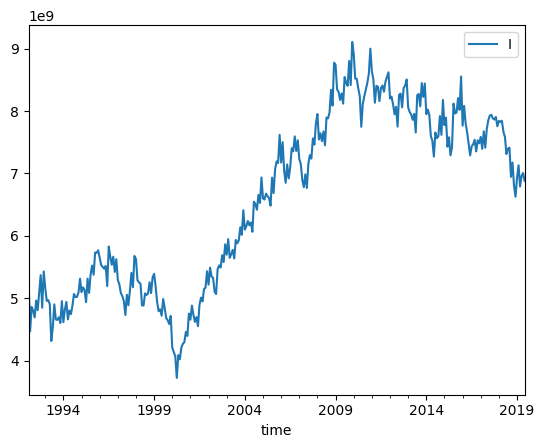

In [20]:
df.plot(x='time', y='y')
plt.legend('Industrial Production')

In [21]:
from statsmodels.tsa.filters.hp_filter import hpfilter
df['logy_cycle'], df['logy_trend'] = hpfilter(df['logy'], lamb=129600)

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/2861883601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logy_cycle'], df['logy_trend'] = hpfilter(df['logy'], lamb=129600)
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_99011/2861883601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logy_cycle'], df['logy_trend'] = hpfilter(df['logy'], lamb=129600)


<Axes: xlabel='time'>

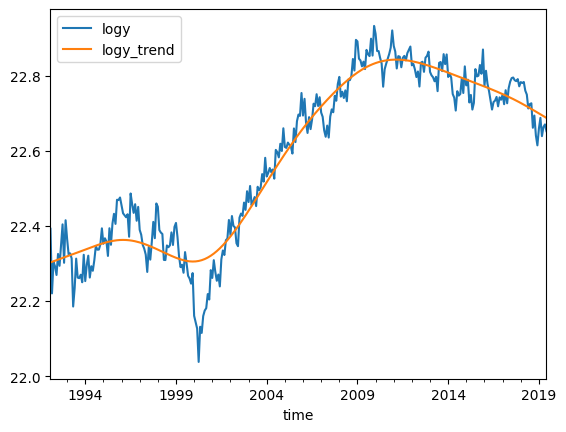

In [22]:
df[['time', 'logy', 'logy_trend']].plot(x='time')

<Axes: xlabel='time'>

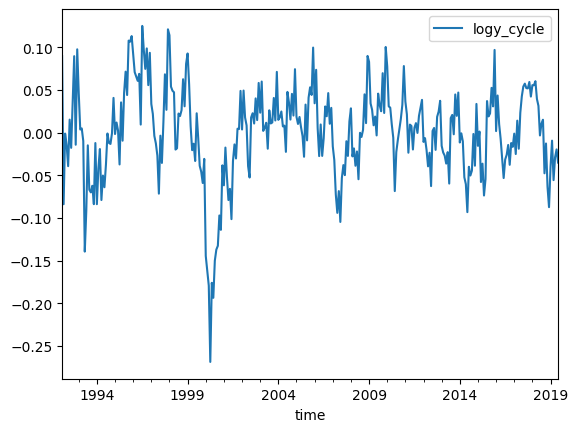

In [23]:
df.plot(x='time', y='logy_cycle')

In [24]:
df.to_csv('../data/cleaned.csv', index=False)